Install necessary libraries

In [ ]:
!pip install matplotlib scikit-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import Birch
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

Generate synthetic data

In [ ]:
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=0.60, random_state=42)

Fit BIRCH model

In [ ]:
birch_model = Birch(n_clusters=3)
birch_model.fit(X)
y_birch = birch_model.predict(X)

Visualize the clusters from BIRCH

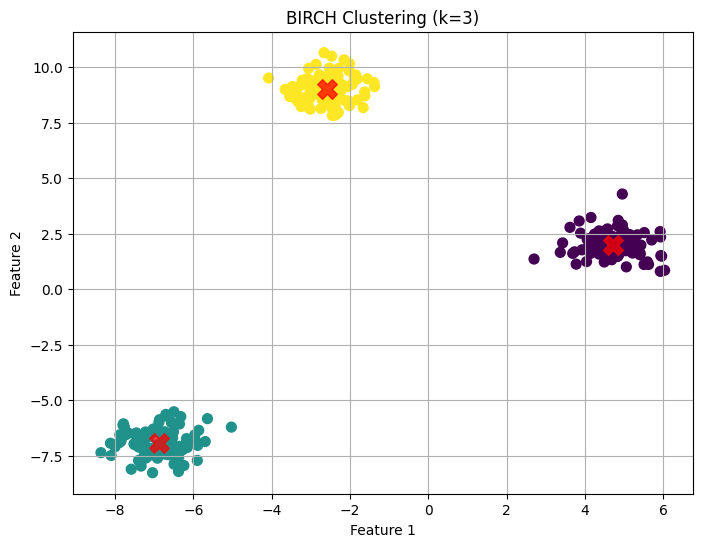

In [ ]:
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_birch, s=50, cmap='viridis')
centers_birch = np.array([X[y_birch == i].mean(axis=0) for i in range(3)])  # Calculate cluster centers
plt.scatter(centers_birch[:, 0], centers_birch[:, 1], c='red', s=200, alpha=0.75, marker='X')  # Mark BIRCH centers
plt.title('BIRCH Clustering (k=3)')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid()
plt.show()

Calculate essential metrics for evaluation

In [ ]:
silhouette_avg_birch = silhouette_score(X, y_birch)  # Mean silhouette score

# Print the metrics
print(f"BIRCH Silhouette Score: {silhouette_avg_birch:.2f}")

BIRCH Silhouette Score: 0.91


Perform Hierarchical Clustering and Visualize Dendrogram

Using the linkage method to generate hierarchical clusters based on BIRCH model

In [ ]:
Z = linkage(X, method='ward')  # 'ward' minimizes variance, can also use 'single', 'complete', etc.

Plotting the Dendrogram

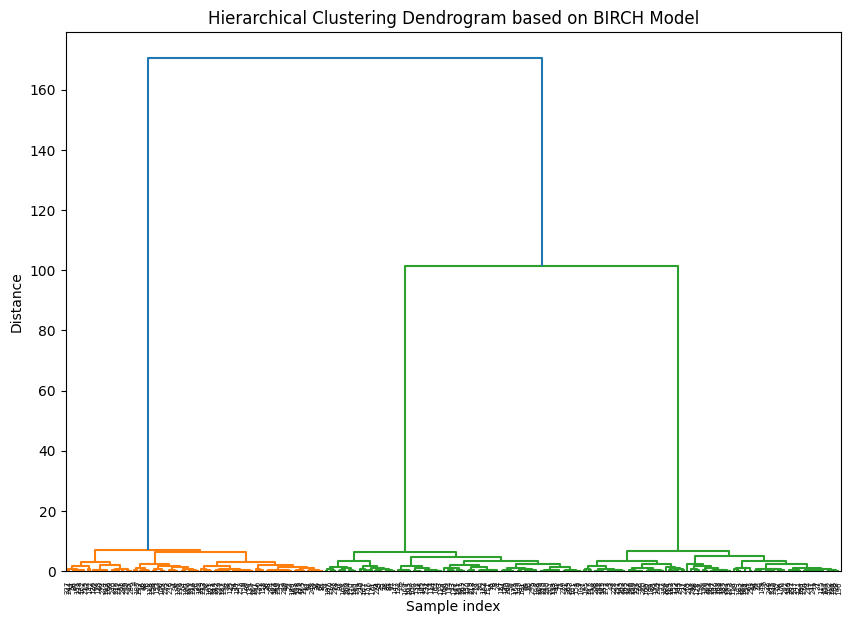

In [ ]:
plt.figure(figsize=(10, 7))
plt.title('Hierarchical Clustering Dendrogram based on BIRCH Model')
dendrogram(Z)
plt.xlabel('Sample index')
plt.ylabel('Distance')
plt.show()